# Proyecto de aplicación de análisis de datos y Modelos de Aprendizaje


## Planteamiento del problema
El área de Servicio al cliente de Casa de Bolsa Actinver deseaaprovechar medios electrónicos (banca en línea) para mejorar la aten-ción a sus clientes, y así también reducir el número de llamadas personaa persona del Call Center y su costo asociado. En el presente proyec-to se utilizará aprendizaje supervisado a través de un conjunto masivode clientes que han realizado llamadas al Call Center, y teniendo comoclasificador, si tiene Banca en Línea. El modelo resultante se utilizaráen el conmutador de recepción de llamadas del Call Center, predicien-do, con la identificación del cliente, si al cliente de dicha llamada se leredireccionará a medios electrónicos automatizados o bien, a la atenciónde una persona del Call Center. El proyecto se basó en el siguiente flujo:1) Recolección de Datos, 2) Preprocesamiento de Datos, 3) Selección deCaracterísticas, 4) Creación de Modelos y finalmente 4) Evaluación deModelos. Utilizando cinco modelos, siendo el Random Forest Classifierel que resultó con una mejor precisión

#Descripción del Dataset

El dataset utilizado *DataClientes.csv* describe el comportamiento de llamadas del Call Center Actinver, quien atiende llamadas de solicitud de servicios diversos.Las características seleccionadas para comprender el dataset, son las siguientes:

*   CLAVE_CLIENTE. Identificación única del cliente	
*   UNIDAD_NEGOCIO.
*   EMISORA_FONDO	
*   CATEGORIA_OP. Capitales, Cuenta Eje, Fondo. Se refiere a la categoría de la operación en donde se aplicó alguna operación.	
*   DESC_CE_FINANCIERO: Sucursal o centro operativo donde se encuentra registrada la cuenta del cliente que llamó.	
*   SALDO_CONTRATO. Saldo del contrato al que se le realizará una operación	
*   SALDO_CLIENTE. Saldo total del cliente.	
*   DESC_TIPO_PERS. Persona Física o Moral.	
*   STATUS_BE: Indica si el cliente tiene dada de alta la banca electrónica
*   FECHA_NACIMIENTO. 
*   GENERO. Femenino o Masculino.
*   EDAD
*   SISTEMA_OPERADO. Sistema que tomó la llamada y la envió al Call Center.

## 1) Recolección de datos
Se obtuvo un conjunto de datos del Call Center de llamadas, sus clientes de los últimos tres meses. Se carga archivo CSV. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#Importamos librerías
import pandas as pd 
import numpy as np
import seaborn as sns 
import pylab as plt

%matplotlib inline  

#Carga de datos desde archivo separado por comas
datos = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DataClientes.csv') 
#Total de columnas que cargamos, características.
print ("Columnas del dataset (13): ",datos.columns) 
datos.describe()

Columnas del dataset (13):  Index(['CLAVE_CLIENTE', 'UNIDAD_NEGOCIO', 'EMISORA_FONDO', 'CATEGORIA_OP',
       'DESC_CE_FINANCIERO', 'SALDO_CONTRATO', 'SALDO_CLIENTE',
       'DESC_TIPO_PERS', 'STATUS_BE', 'FECHA_NACIMIENTO', 'GENERO', 'EDAD',
       'SISTEMA_OPERADO'],
      dtype='object')


,CLAVE_CLIENTE,SALDO_CONTRATO,SALDO_CLIENTE
count,3.358000e+03,3.358000e+03,3.358000e+03
mean,9.347726e+07,2.307899e+06,2.741479e+06
std,1.798849e+06,3.096281e+07,3.458292e+07
min,9.000003e+07,0.000000e+00,0.000000e+00
25%,9.204392e+07,7.003748e+04,8.651305e+04
50%,9.367823e+07,2.331926e+05,2.815358e+05
75%,9.513746e+07,6.879034e+05,8.150791e+05
max,9.618335e+07,1.214598e+09,1.245958e+09


## 2) Selección de atributos y Preprocesamiento de datos.
Se realizaron algunas decisiones, para mejorar la calidad de los datos: Se eliminó la variable Saldo Contrato, dejando Saldo Cliente, ya que los valores de ambas eran prácticamente iguales. Se eliminaron de igual manera la Fecha de Nacimiento, ya que era redundante con la Edad. El Sistema Operado no aporta valor alguno, ya que finalmente cualquiera de las llamadas recibidas por cualquiera de los sistemas, se considra del mismo valor. Finalmente quedando ocho características para crear los modelos.
Una vez que definimos las columnas, o variables, que utilizaremos en la construcción del dataset recurrimos a reglas del negocio para saber cómo tratar los valores *en blanco* o nulos.

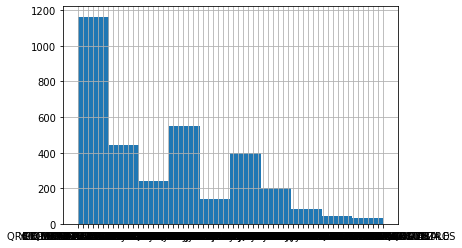

In [3]:
datos['DESC_CE_FINANCIERO'].replace( {'':'Desconocido' }, inplace = True) 
# en migraciones de la BD se pierden algunas direcciones
# Se reemplazarn los valores 'Desconocido' de esta columna y se reemplazan con vacío 
# nos fijamos en su distribucion 
datos.DESC_CE_FINANCIERO.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f818bcbf0f0>]],
      dtype=object)

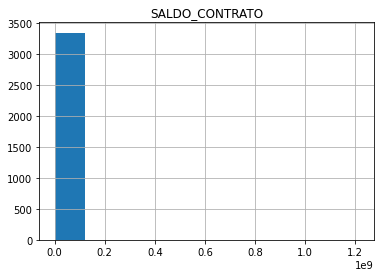

In [4]:
# imputamos la variable SALDO_CONTRATO'. Cuando trae saldo Cero, colocamos  el promedio global.
# ya que  por la mediana pues hay valores muy grandes y usar la media sesga más
datos['SALDO_CONTRATO'].replace({ 0: np.median(datos.SALDO_CONTRATO)}, inplace=True)
datos[['SALDO_CONTRATO']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f818bbfbe10>]],
      dtype=object)

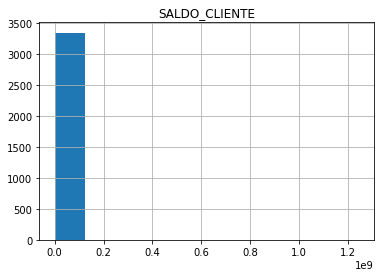

In [5]:
# para poder imputar los valores que no se tienen de la variable 'SALDO_CLIENTE', los ceros.
datos[['SALDO_CLIENTE']].describe()
# imputamos la variable datos[['SALDO_CLIENTE']] por la mediana pues hay valores muy grandes y usar la media sesga más
datos['SALDO_CLIENTE'].replace({ 0: np.median(datos.SALDO_CLIENTE)}, inplace = True)
datos[['SALDO_CLIENTE']].hist()

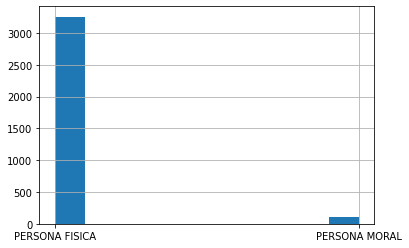

In [6]:
# para imputar el tipo de cliente, variable 'DESC_TIPO_PERS' lo hacemos por reglas del negocio.
# La mayoria de clientes son personas fisicas. Los valores que vengan vacíos los ponemos como persona física
datos.DESC_TIPO_PERS.value_counts
datos[['DESC_TIPO_PERS']] = datos[['DESC_TIPO_PERS']].fillna(value='PERSONA FISICA')
datos['DESC_TIPO_PERS'].hist()

object
int64


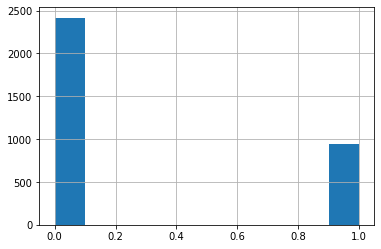

In [7]:
# para imputar la variable a predecir el tipo de cliente, variable 'STATUS_BE'
# lo hacemos por reglas del negocio, si el cliente tiene dado de alta la banca electronica 
#lo marcamos como 1 y 0 en otro caso 
datos['STATUS_BE'] = datos['STATUS_BE'].fillna(value='NO_ENROLADO')

print (datos['STATUS_BE'].dtypes)
datos['STATUS_BE'].unique()

if datos.STATUS_BE.dtypes == 'object':
  datos['STATUS_BE'].replace({ 'NO_ENROLADO': 0, 'ENROLADO':1}, inplace=True)
print (datos['STATUS_BE'].dtypes)
datos['STATUS_BE'].hist()

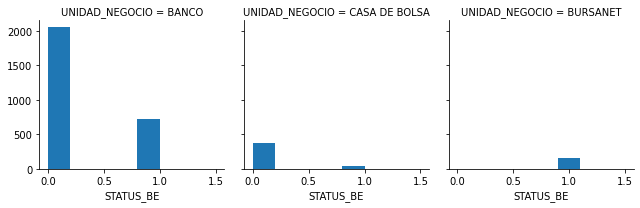

In [8]:
import seaborn as sns
import pylab as plt

g = sns.FacetGrid (datos,  col ='UNIDAD_NEGOCIO')
g.map (plt.hist, 'STATUS_BE', bins = 5)

In [9]:
#Preprocesamos la columna Edad, eliminando la palabra "PM" y cambiamos las edades de menores de 9 años,
#Tratamos la columna como numérico
print (datos.EDAD.dtypes )
datos['EDAD'].replace({ 'PM': 0}, inplace=True)

object


In [10]:
datos['EDAD'].astype('int64')
datos['EDAD'].describe()

count     3358
unique      90
top          0
freq       105
Name: EDAD, dtype: int64

In [0]:
# Como la mayoria de las columnas son nominales las transformamos a dummies 
#y realizamos un escalamiento
del datos['CLAVE_CLIENTE']
datos['UNIDAD_NEGOCIO'] = datos['UNIDAD_NEGOCIO'].astype('category')
datos['EMISORA_FONDO'] = datos['EMISORA_FONDO'].astype('category')
datos['CATEGORIA_OP'] = datos['CATEGORIA_OP'].astype('category')
datos['DESC_CE_FINANCIERO'] = datos['DESC_CE_FINANCIERO'].astype('category')
datos['DESC_TIPO_PERS'] = datos['DESC_TIPO_PERS'].astype('category')
datos['GENERO'] = datos['GENERO'].astype('category')
datos['SISTEMA_OPERADO'] = datos['SISTEMA_OPERADO'].astype('category')

# Selección de características

De las variables numéricas que disponemos, que corresponden con saldos en cuenta de los clientes en dos diferentes momentos, estas estan altamente correlacionadas (como lo muestra la siguiente grafica), por lo que descartaremos la segunda como *feature* para el modelo de clasificación que construiremos.

[[1.         0.90527514]
 [0.90527514 1.        ]]


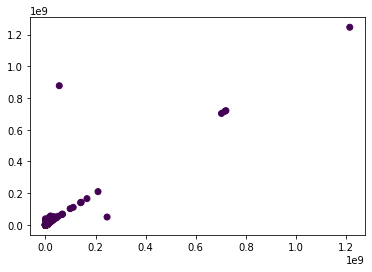

In [12]:
import matplotlib.pyplot as plt

plt.scatter(datos['SALDO_CONTRATO'], datos['SALDO_CLIENTE'], c = datos['STATUS_BE'])
print(np.corrcoef(datos['SALDO_CONTRATO'], datos['SALDO_CLIENTE']))

#Ya que la relación es muy cercana, se eliminará de las características el SALDO_CONTRATO

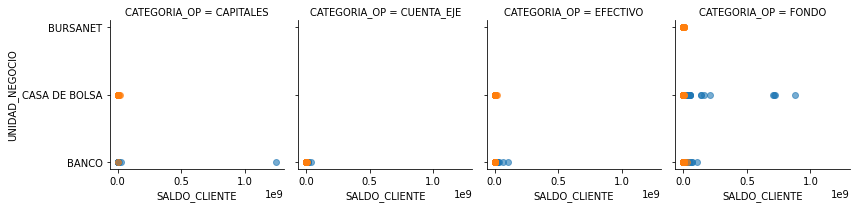

In [13]:
#CLAVE_CLIENTE	UNIDAD_NEGOCIO	EMISORA_FONDO	CATEGORIA_OP	
#DESC_CE_FINANCIERO	SALDO_CONTRATO	SALDO_CLIENTE	DESC_TIPO_PERS	GENERO	EDAD
datos['STATUS_BE'].describe()
datos['EDAD'].describe()


g = sns.FacetGrid (datos, col = 'CATEGORIA_OP', hue = 'STATUS_BE')
g.map(plt.scatter, 'SALDO_CLIENTE' , 'UNIDAD_NEGOCIO', alpha= 0.6)

In [14]:

datos = datos.drop(['FECHA_NACIMIENTO'], axis=1, errors='ignore')
datos = datos.drop(['SISTEMA_OPERADO'], axis=1, errors='ignore')
datos.describe()

cat_columns = datos.select_dtypes(['category']).columns


y = datos['STATUS_BE']
del datos['STATUS_BE']
del datos['SALDO_CLIENTE']
datos[cat_columns] = datos[cat_columns].apply(lambda x: x.cat.codes)
datos.columns

Index(['UNIDAD_NEGOCIO', 'EMISORA_FONDO', 'CATEGORIA_OP', 'DESC_CE_FINANCIERO',
       'SALDO_CONTRATO', 'DESC_TIPO_PERS', 'GENERO', 'EDAD'],
      dtype='object')

En vista de que la mayoría de las columnas con las que trabajaremos son nominales vamos a realizar un Encoding, es decir, cambiar de una variable de texto a una numérica. 
Como tenemos algunas variables con más de 50 categorías en lugar de hacer dummies estas variables usaremos un encoding que mapea a cada categoría con un entero. 

In [15]:
# copia del dataset original preprocesado
import copy
final = copy.deepcopy(datos) 

x = datos

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)

datos = scaler.transform(x)
final


,UNIDAD_NEGOCIO,EMISORA_FONDO,CATEGORIA_OP,DESC_CE_FINANCIERO,SALDO_CONTRATO,DESC_TIPO_PERS,GENERO,EDAD
0,0,16,3,45,441734.540,0,1,54
1,0,38,1,45,36970.670,0,1,55
2,0,3,3,45,8170064.720,0,1,57
3,0,16,3,45,1050385.330,0,1,47
4,0,9,3,45,9233.840,0,0,54
...,...,...,...,...,...,...,...,...
3353,0,38,1,11,310000.000,0,0,27
3354,0,11,3,6,32009.000,0,1,29
3355,0,11,3,38,60047.520,0,0,70
3356,2,0,0,-1,233192.585,0,1,52


 Con el encoding anterior ya podemos entrenar los modelos de la libraría sklearn, además como todas las variables se convirtieron a tipo numérico, realizamos un analisis de componentes principales para crear nuevos *features* que campen el 90% de la varianza de los datos originales, con lo que nos quedamos con  7 variables:  UNIDAD_NEGOCIO, EMISORA_FONDO, CATEGORIA_OP, DESC_CE, SALDO_CONTRATO, TIPO_PERSONA (Física o Moral), GENERO Y EDAD.
 Se desecharon los datos: CLAVE_CLIENTE, SALDO_CLIENTE. 

Uso de la transformación PCA para mejorar la aproximación de los modelos y uso de las 8 características.

In [16]:
from sklearn.model_selection import train_test_split

#Se toma un 70% para entrenamiento, queda 30% para validación
train_x, test_x, train_y, test_y = train_test_split( datos, y, test_size = 0.7, random_state=0)

#Principal Component Analysis 
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(0.9)
pca.fit(train_x)
train_pca_x = pca.transform(train_x)
test_pca_x = pca.transform(test_x)
train_pca_x.shape

(1007, 6)

## 3) Creación de modelos

En esta sección creamos Cuadro Modelos diferentes correspondientes a los clasificadores: kmeans, mezcla de gaussianas, bosques aleatorios o random forest y el XGBoosting (Gradient boosting) .

In [0]:
# inicializamos los modelos que evaluaremos
modelos = []
from sklearn.cluster import KMeans

# 2 centros pues son el numero de categorias a clasificar
modelos.append(   KMeans(n_clusters = 2).fit(train_pca_x) ) 

from sklearn.mixture import GaussianMixture
modelos.append( GaussianMixture (n_components = 2, covariance_type = 'full').fit(train_pca_x))

from sklearn.ensemble import RandomForestClassifier
modelos.append( RandomForestClassifier(random_state=0).fit(train_pca_x, train_y) )

import xgboost as xgb
modelos.append( xgb.XGBClassifier(random_state=1,learning_rate=0.01).fit(train_pca_x, train_y) )

from sklearn.naive_bayes import GaussianNB
modelos.append(GaussianNB().fit(train_pca_x, train_y))

from sklearn.linear_model import LogisticRegression
modelos.append(LogisticRegression (max_iter = 5000).fit(train_pca_x, train_y))
# tal vez sea necesario instalar la libraria y reiniciar el notebook 
# !pip install xgboost

## 4) Evaluación de los Modelos

Entrenamos y evaluamos por medio de la precisión (*accuracy*) en el conjunto de prueba el desempeño de los modelos.

In [18]:
from sklearn.metrics import accuracy_score
precision = []
for i in modelos:
    y_temp = i.predict(test_pca_x)
    precision.append( accuracy_score(test_y, y_temp) )
precision

[0.29987239472564864,
 0.6022968949383242,
 0.7430880476393025,
 0.7392598894087622,
 0.6775840068056146,
 0.7290514674606551]

El modelo Random Forest es el modelo con mayor precisión por lo que lo elegimos como ganador y procedemos a afinar el modelo por medio de sus parámetros con una búsqueda de grid.

In [0]:
grid = {}
for _ in range(0, 40):
    model = RandomForestClassifier(n_estimators = _*6+2, random_state=0 )
    model.fit(train_pca_x, train_y)
    y_temp = model.predict(test_pca_x)    
    grid[str(_*6+2)] =  accuracy_score(test_y, y_temp) 

In [29]:
grid

{'104': 0.7413866439812845,
 '110': 0.7430880476393025,
 '116': 0.74096129306678,
 '122': 0.7392598894087622,
 '128': 0.74096129306678,
 '134': 0.7396852403232667,
 '14': 0.7401105912377711,
 '140': 0.7388345384942577,
 '146': 0.7379838366652488,
 '152': 0.7371331348362399,
 '158': 0.736282433007231,
 '164': 0.7367077839217354,
 '170': 0.7350063802637176,
 '176': 0.7345810293492131,
 '182': 0.7341556784347086,
 '188': 0.7345810293492131,
 '194': 0.7367077839217354,
 '2': 0.7175669927690345,
 '20': 0.7384091875797533,
 '200': 0.735431731178222,
 '206': 0.7333049766056997,
 '212': 0.7345810293492131,
 '218': 0.7367077839217354,
 '224': 0.7358570820927265,
 '230': 0.7333049766056997,
 '236': 0.7337303275202042,
 '26': 0.735431731178222,
 '32': 0.7388345384942577,
 '38': 0.7367077839217354,
 '44': 0.7320289238621863,
 '50': 0.7384091875797533,
 '56': 0.736282433007231,
 '62': 0.7367077839217354,
 '68': 0.741811994895789,
 '74': 0.7435133985538069,
 '8': 0.7345810293492131,
 '80': 0.7418119

In [30]:
new = pd.Series(grid)
new.describe()

count    40.000000
mean      0.737293
std       0.004540
min       0.717567
25%       0.734900
50%       0.736708
75%       0.740323
max       0.744364
dtype: float64

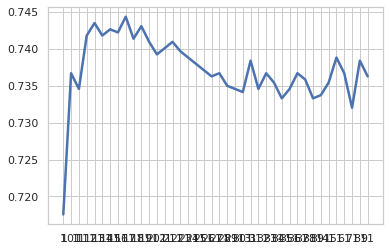

In [26]:
sns.set(style="whitegrid")
# Plot the responses for different events and regions
sns.lineplot( style="choice",  data=new, markers=True, dashes=False, palette="tab10", linewidth=2.5)

Donde el mejor modelo lo obtenemos con 241 árboles en el bosque. Finalmente entrenamos este modelo y predecimos las categorías de todo el conjunto de clientes y lo exportamos.

In [0]:
#final = scaler.transform(final)
#pca = PCA(.9)
#pca.fit(final)
#final = pca.transform(final)

model = RandomForestClassifier(n_estimators = 98, random_state=0, max_features= 'auto' )
model.fit(final, y)
y_hat = model.predict(final)


model.fit(train_pca_x, train_y)
y_temp = model.predict(test_pca_x)    
score =  accuracy_score(test_y, y_temp) 

In [32]:
final = pd.DataFrame(final)
final['STATUS_BE'] = y
final['Prediction'] = pd.DataFrame(y_hat)
final.head()

,UNIDAD_NEGOCIO,EMISORA_FONDO,CATEGORIA_OP,DESC_CE_FINANCIERO,SALDO_CONTRATO,DESC_TIPO_PERS,GENERO,EDAD,STATUS_BE,Prediction
0,0,16,3,45,441734.54,0,1,54,0,0
1,0,38,1,45,36970.67,0,1,55,0,0
2,0,3,3,45,8170064.72,0,1,57,0,0
3,0,16,3,45,1050385.33,0,1,47,0,0
4,0,9,3,45,9233.84,0,0,54,0,0


In [0]:
final.to_csv('Final.csv')

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_temp)
print (cm)

[[1460  254]
 [ 347  290]]


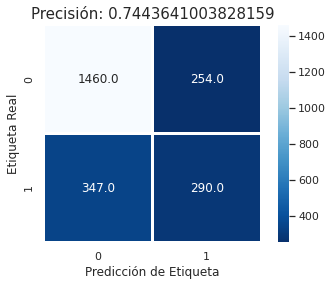

In [34]:
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=2, square = True, cmap = 'Blues_r');
plt.ylabel('Etiqueta Real');
plt.xlabel('Predicción de Etiqueta');
all_sample_title = 'Precisión: {0}'.format(score)
plt.title(all_sample_title, size = 15);

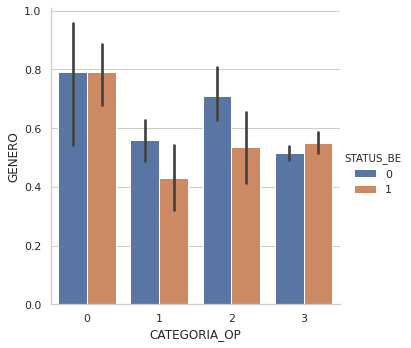

In [43]:
sns.catplot(x="CATEGORIA_OP", y="GENERO", hue="STATUS_BE", kind="bar", data=final);

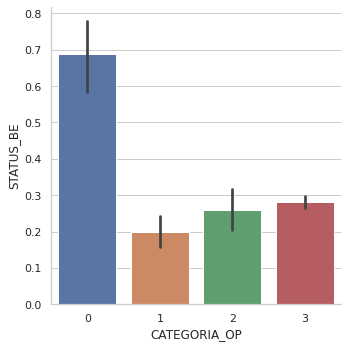

In [44]:
sns.catplot(x="CATEGORIA_OP", y="STATUS_BE", kind="bar", data=final);

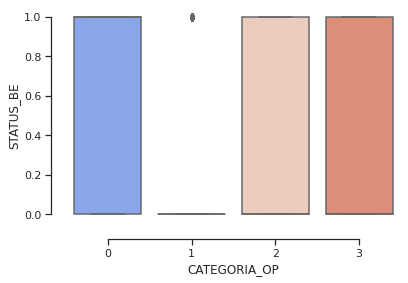

In [58]:
sns.set(style="ticks", palette="Blues_d")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="CATEGORIA_OP", y="STATUS_BE",
             palette="coolwarm",
            data=final)
sns.despine(offset=15, trim=True)